# Final Report

In [1]:
# Necessary Imports
import elm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import math
import disarray

## Necessary Functions

In [2]:
# Train and  giving accuracy on bestWeight
# NOTE : loss and fitness may or may not be correct.
#        Not to rely on the respective metrics and use the metrics function below
def final_elm_fitness(weightBais, numberOfHiddenNuerons, numberOfInputNuerons, bestWeight=0):
    tempWeightBais = weightBais.reshape(numberOfHiddenNuerons,numberOfInputNuerons+1, order="F")
    inputWeight = tempWeightBais[:,:numberOfInputNuerons]                 
    baisOfHiddenNuerons = tempWeightBais[:,numberOfInputNuerons]
    
    #--- Create Instance of ELM Model ---+
    model = elm.ELM(
        X_train.shape[1],
        numberOfHiddenNuerons,
        classes_len,
        activation = "sigmoid",
        w_init=np.transpose(inputWeight),
        bias_init=baisOfHiddenNuerons,
        # beta_init=bestWeight
    )

    #--- Train ---+
    model.fit(X_train, Y_train)
    #--- Predict and Evaluate ---+
    loss, acc, fitness = model.evaluate(X_test, Y_test)
    Y_pred = model(X_test)
    return loss, acc, fitness, Y_pred

In [3]:
# Building Confusion Matrix
def confusion_matrix_TEST(Y_pred, Y_test):
    T = Y_pred
    Y = Y_test
    N = T.shape[0]
    batch = 1200
    C = 6
    nb = int(np.ceil(float(N) / batch))
    print(nb)
    conf = np.zeros((C, C))
    for b in range(nb):
        start = b*batch
        stop = min((b+1)*batch, N)
        Tb = np.array(T[start:stop]) > 0.5
        Yb = np.array(Y[start:stop]) > 0.5
        for c1 in range(C):
            for c1h in range(C):
                conf[c1, c1h] += np.sum(Tb[:, c1] * Yb[:, c1h])
    return conf               

In [4]:
# Plotting Beautiful Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix'):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure()
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else '.1f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        cm[i, j] = 0 if np.isnan(cm[i, j]) else cm[i, j]
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [5]:
# Fast loading of Data and Best Weight
# NOTE: the test data train data is stored in numpy arrays
#       this helps to load the data fast and generate the metrics easily
# Function take filenames list as input and loads.
def load(filenames):
    bestWeight = np.load(filenames[0]) 
    X_train = np.load(filenames[1])
    Y_train = np.load(filenames[2])
    X_test  = np.load(filenames[3])
    Y_test  = np.load(filenames[4])

    return bestWeight, X_train, Y_train, X_test, Y_test

In [6]:
# In thought process
def get_metrics(Y_pred, Y_test):
    pass

In [7]:
#setting some variables
classes = ['N', 'L', 'R', 'A', 'V', '/']            #class names
classes_len = len(classes)
filenames = ["bestWeight-88.npy", "X_train.npy", "Y_train.npy", "X_test.npy", "Y_test.npy"]  # numpy array filenames

## Loading of data

In [8]:
bestWeight, X_train, Y_train, X_test, Y_test = load(filenames)

## Setting up elm data

In [9]:
numberOfHiddenNuerons = 600
numberOfInputNuerons = X_train.shape[-1]

## Running ELM on weights generated by DE

In [10]:
rmse, acc, fitness, Y_pred = final_elm_fitness(
    bestWeight, 
    numberOfHiddenNuerons, 
    numberOfInputNuerons,
    )

# Metrics

### Confusion Matrix

Normalized confusion matrix


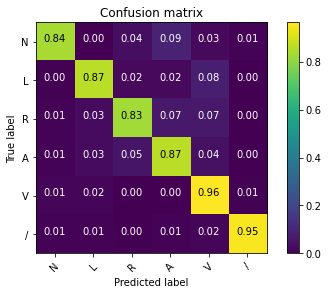

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(Y_pred, axis=1) , np.argmax(Y_test, axis=1))
plot_confusion_matrix(cm, classes, True)

## Per Class Metrics

In [13]:
# Normalize Confusion Matrix
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

TP = np.diag(cm)
FP = cm.sum(axis=0) - TP  
FN = cm.sum(axis=1) - TP
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

prev = True
for i in range(classes_len):
    prev = prev and (TP[i] + FP[i] + FN[i] + TN[i] == Y_test.shape[0])
if prev:
    print("Sanity Check Passed")
else:
    print("Sanity Check Failed")

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
# Overall Misclassification
MISC = (FP+FN)/(TP+TN+FP+FN)

Sanity Check Passed


In [14]:
print("Overall Model Accuracy: ",(sum(np.diag(cm))/1200)*100)

Overall Model Accuracy:  88.08333333333334


## Overall Metrics

In [21]:
df = pd.DataFrame(cm, index=classes, columns=classes, dtype=int)
nDf = (df.da.export_metrics())

In [23]:
nDf.to_excel("metrics_report.xlsx") 